In [2]:
#Mini project 1= Avigail Cohen 214122871


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid") # Set a clean and readable visual style for all plots

df = pd.read_csv("laptop_price - dataset.csv") # Load the laptop price dataset into a pandas DataFrame


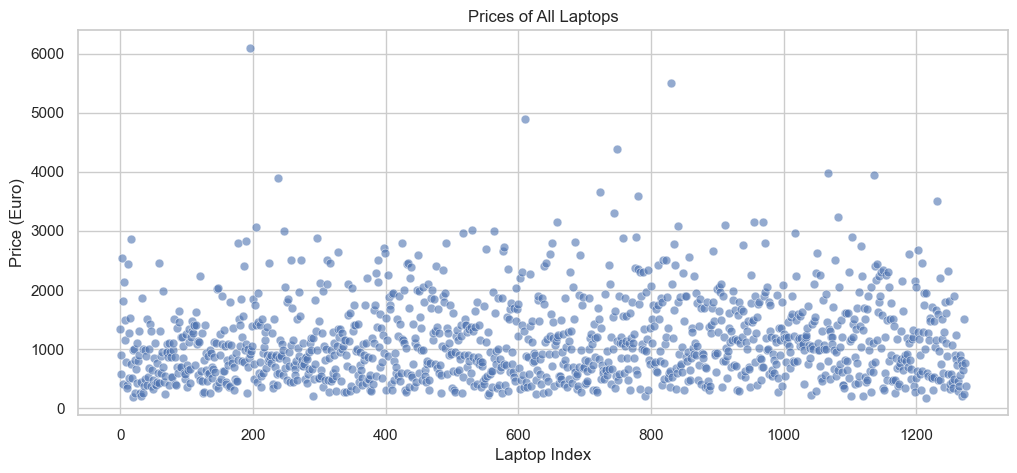

In [ ]:
#Task 1-Plot the price of all the laptops

# Visualize the distribution of laptop prices in the dataset.
# Each point represents a laptop, allowing observation of the
# overall price spread and potential extreme values.


plt.figure(figsize=(12,5)) # Create a new figure with a defined size
# Plot the price of each laptop as a single point
# x-axis: laptop index (order in the dataset)
# y-axis: laptop price in Euro
sns.scatterplot(
    x=df.index,
    y=df["Price (Euro)"],
    alpha=0.6,   # Set transparency to reduce overlap between points
    s=40         # Set the size of each point
)
plt.title("Prices of All Laptops")
plt.xlabel("Laptop Index")
plt.ylabel("Price (Euro)")
plt.show()

The company with the highest average laptop price is Razer, with an average price of 3346.14 Euro.


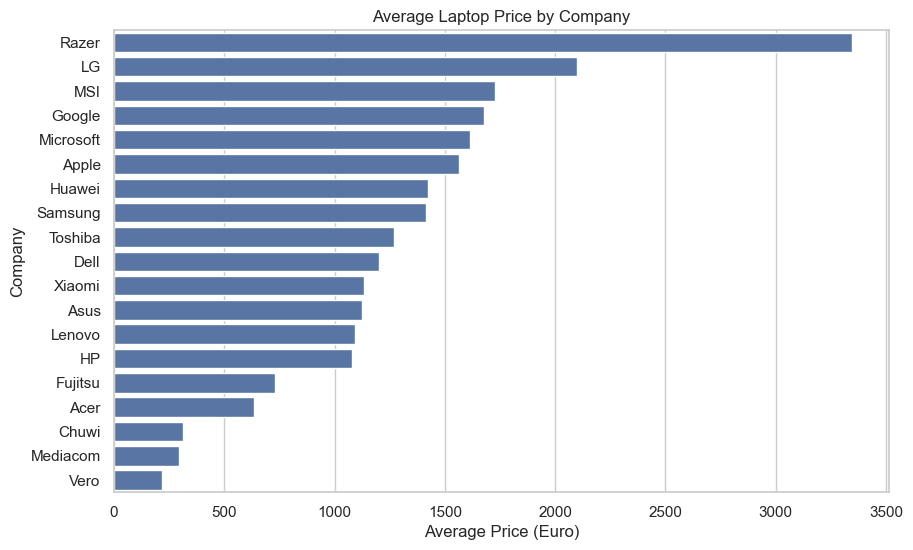

In [ ]:
#Task 2
# Calculate the average laptop price for each company.
# This enables comparison between manufacturers and helps
# identify differences in average pricing.

avg_price_by_company = df.groupby("Company")["Price (Euro)"].mean()# Group the data by company and calculate the mean price
avg_price_by_company = avg_price_by_company.sort_values(ascending=False) # Sort the companies by average price in descending order
# Identify the company with the highest average price
most_expensive_company = avg_price_by_company.index[0]
highest_avg_price = avg_price_by_company.iloc[0]
print(f"The company with the highest average laptop price is {most_expensive_company}, with an average price of {highest_avg_price:.2f} Euro.")

plt.figure(figsize=(10,6))

sns.barplot(
    x=avg_price_by_company.values,
    y=avg_price_by_company.index
)

plt.title("Average Laptop Price by Company")
plt.xlabel("Average Price (Euro)")
plt.ylabel("Company")
plt.show() #show the plot


In [ ]:
#Task 3- Find the different types of Operating systems present in the data (OpSys), and make them uniform.
# Clean the operating system column by grouping different
# versions of the same operating system into broader categories
# to simplify further analysis.
# Windows 7 and Windows 10 were kept as separate categories
# to allow comparison between different Windows versions.




df["OpSys_clean"] = df["OpSys"]# Create a cleaned operating system column
# Unify Mac operating system names
df["OpSys_clean"] = df["OpSys_clean"].replace(
    ["macOS", "Mac OS X"],
    "macOS"
)
# Unify Windows 10 variants

df["OpSys_clean"] = df["OpSys_clean"].replace(
    ["Windows 10", "Windows 10 S"],
    "Windows 10"
)
print(df["OpSys_clean"].unique()) # Check the cleaned unique values

['macOS' 'No OS' 'Windows 10' 'Linux' 'Android' 'Chrome OS' 'Windows 7']


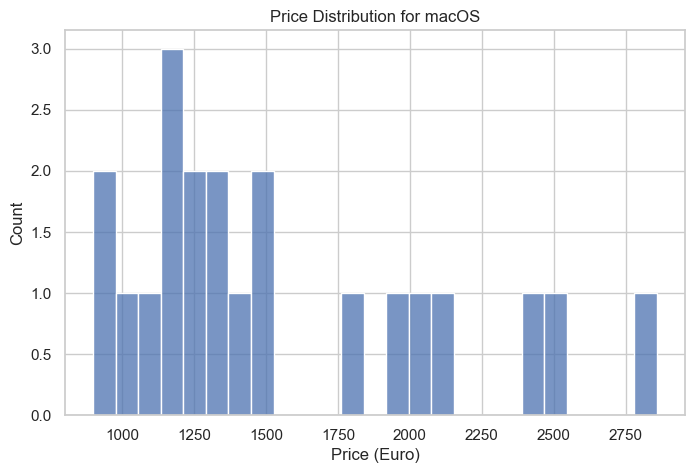

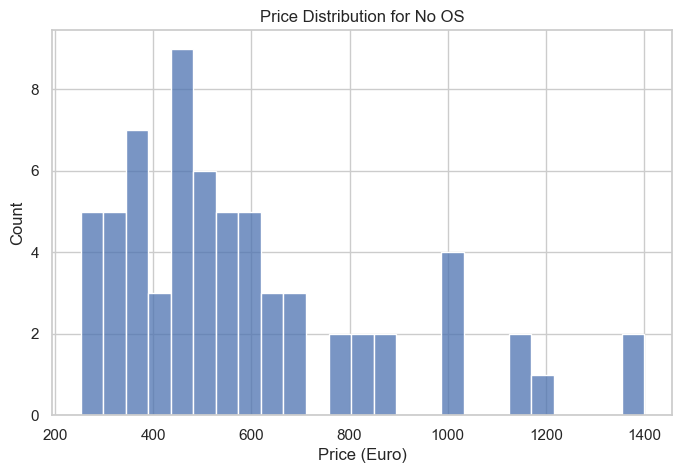

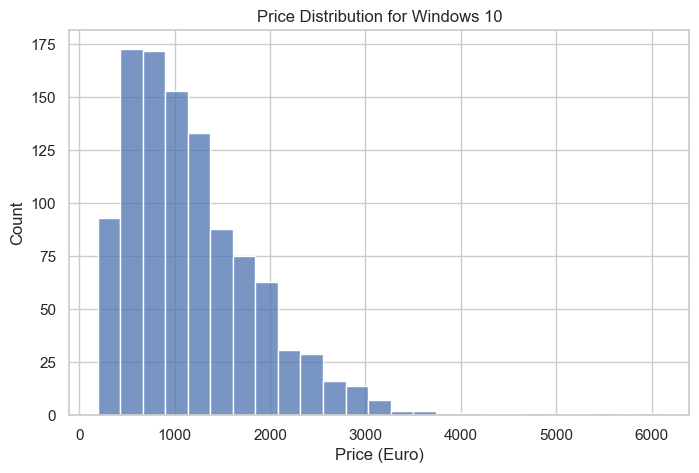

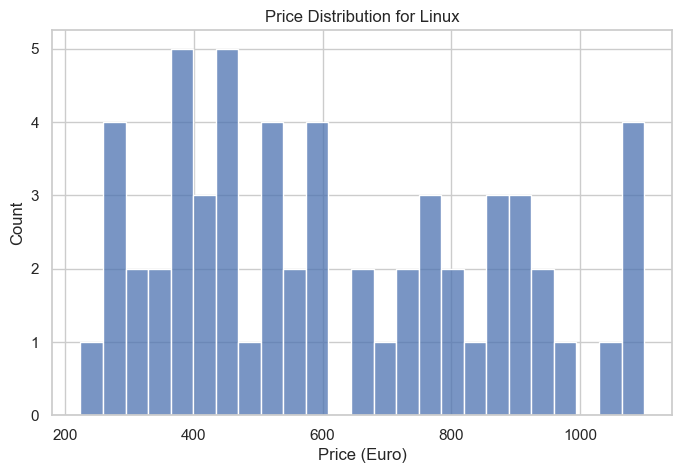

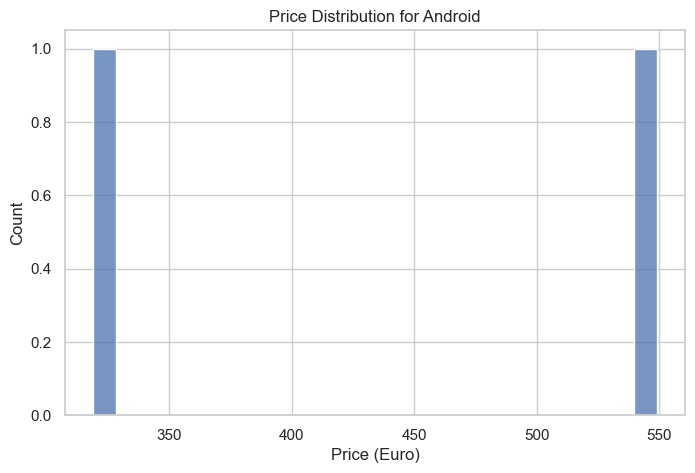

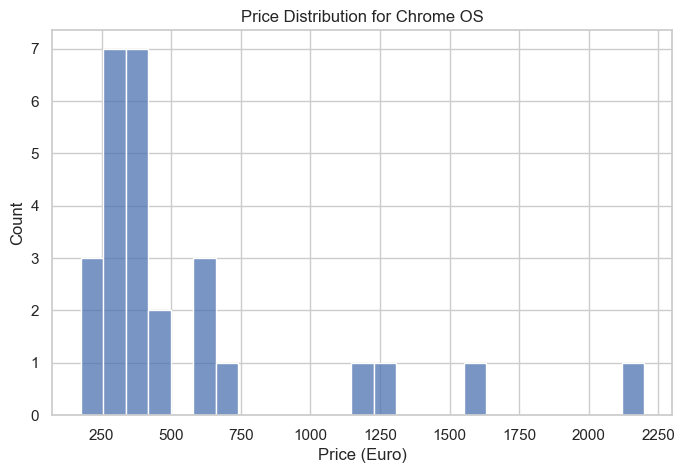

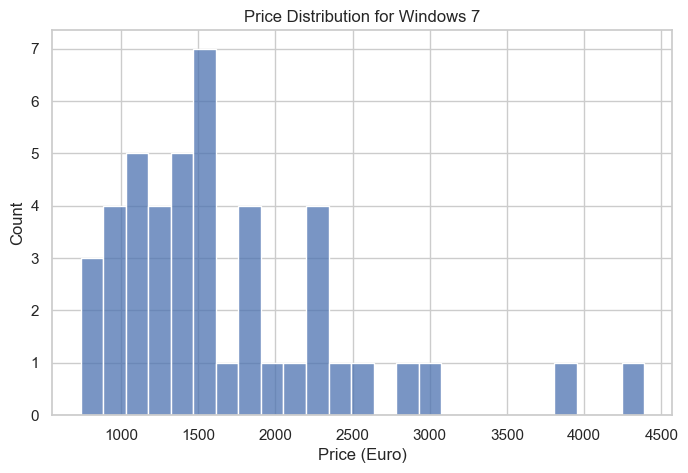

In [ ]:
#Task 4-
# Plot price distribution for each operating system
# to examine whether price ranges differ across systems.


# Get unique operating systems
operating_systems = df["OpSys_clean"].unique()

# Loop through each operating system
for os_name in operating_systems:
    
    # Create a new figure for each OS
    plt.figure(figsize=(8,5))
    
    # Plot the price distribution
    sns.histplot(
        df[df["OpSys_clean"] == os_name]["Price (Euro)"],
        bins=25,
    )
    
    # Add titles and labels
    plt.title(f"Price Distribution for {os_name}")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Count")
    
    # Show the plot
    plt.show()

Number of outliers: 54
      RAM (GB)  Price (Euro)     residual
17          16       2858.00   953.798396
196         32       6099.00  2566.624093
204         16       3055.00  1150.798396
226         16        859.01 -1045.191604
235         16        899.00 -1005.201604
247         16       2999.00  1094.798396
249          8       2040.00   949.885547
297         16       2884.86   980.658396
385          8       2282.00  1191.885547
388          8       2135.00  1044.885547
398          8       2712.00  1621.885547
456          8       2046.00   955.885547
464          8       2090.00   999.885547
476          8       2408.00  1317.885547
494         24       1269.00 -1449.288756
530         16       3012.77  1108.568396
563          8       2999.00  1908.885547
610         32       4899.00  1366.624093
611         16        879.01 -1025.191604
678          8       2299.00  1208.885547
693          8       2590.00  1499.885547
744         16       3299.00  1394.798396
749        

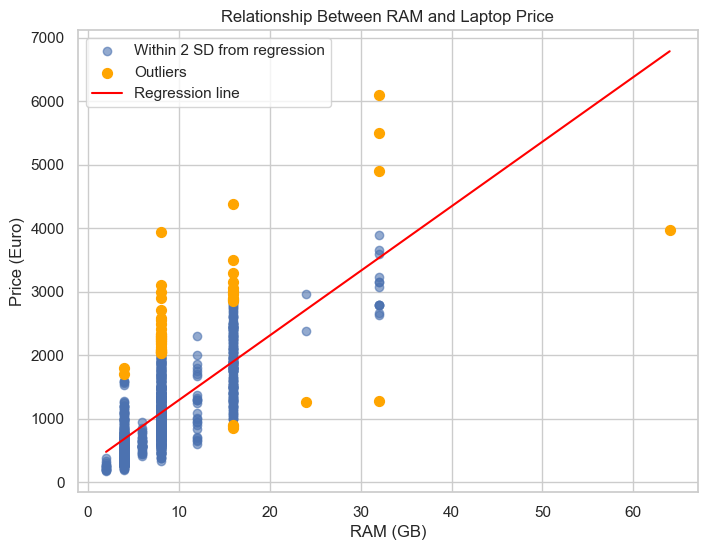

In [ ]:
# Task 5: Relationship between RAM and laptop price

# Examine the relationship between RAM size and laptop price.
# A linear trend line is fitted, and laptops with unusually high
# or low prices relative to their RAM are identified as outliers.


# Define variables
x = df["RAM (GB)"]
y = df["Price (Euro)"]

# Fit a linear regression model
slope, intercept = np.polyfit(x, y, 1)

# Predicted price based on RAM
df["predicted_price"] = intercept + slope * x

# Residual = actual price - predicted price
df["residual"] = y - df["predicted_price"]

# Standard deviation of residuals
# Outliers are identified based on deviation from the regression line
# using standard deviation of residuals, rather than IQR, since the
# goal is to detect laptops that deviate from the expected RAM–price relationship.

residual_std = df["residual"].std()

# Define outliers as points more than 2 SD from the regression line
df["outlier"] = abs(df["residual"]) > 2 * residual_std

# Print detected outliers
print("Number of outliers:", df["outlier"].sum())


plt.figure(figsize=(8, 6))

# Regular observations
plt.scatter(
    df.loc[~df["outlier"], "RAM (GB)"],
    df.loc[~df["outlier"], "Price (Euro)"],
    alpha=0.6,
    label="Within 2 SD from regression"
)

# Outliers
plt.scatter(
    df.loc[df["outlier"], "RAM (GB)"],
    df.loc[df["outlier"], "Price (Euro)"],
    color="orange",
    s=50,
    label="Outliers"
)

# Regression line
x_sorted = np.sort(x)
plt.plot(
    x_sorted,
    intercept + slope * x_sorted,
    color="red",
    label="Regression line"
)

plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euro)")
plt.title("Relationship Between RAM and Laptop Price")
plt.legend()
plt.show()


In [ ]:
# Task 6: Extract storage type from the Memory column

#A new column named "Storage type" was created by extracting the storage type information from the "Memory" column. Using a regular expression, the storage medium (SSD or HDD) was identified for each laptop, allowing further analysis based on storage technology.

# Extract the storage type (SSD or HDD) from the Memory column
# The regular expression searches for the keywords 'SSD' or 'HDD'
df["Storage type"] = df["Memory"].str.extract(r'(SSD|HDD|Flash Storage|Hybrid)')
# Replace missing values (NaN) with 'Other'
df["Storage type"] = df["Storage type"].fillna("Other")

# Uncomment the line below to verify the extraction result
# print(df[["Memory", "Storage type"]].head())



